In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('CarPrice_Assignment.csv')
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
df.drop('car_ID', axis=1, inplace=True)

In [3]:
df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())
df['CarBrand'].replace({
    'maxda': 'mazda', 'porcshce': 'porsche', 'toyouta': 'toyota',
    'vokswagen': 'volkswagen', 'vw': 'volkswagen'
}, inplace=True)
df.drop('CarName', axis=1, inplace=True)

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_9772\1457090010.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CarBrand'].replace({


In [4]:
df['doornumber'] = df['doornumber'].str.lower()
df['cylindernumber'] = df['cylindernumber'].str.lower()


Text(0.5, 1.0, 'Price Distribution')

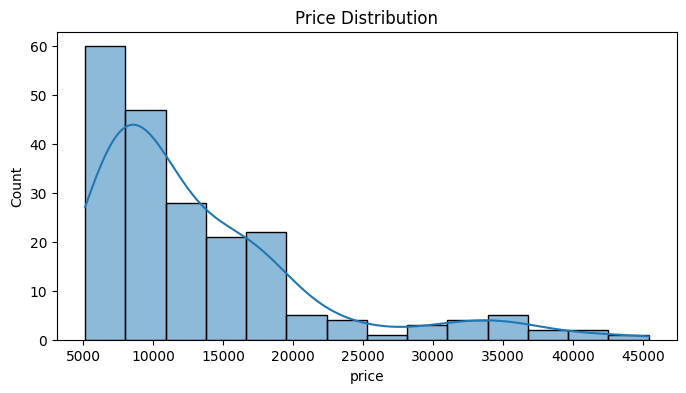

In [6]:
# Price Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')

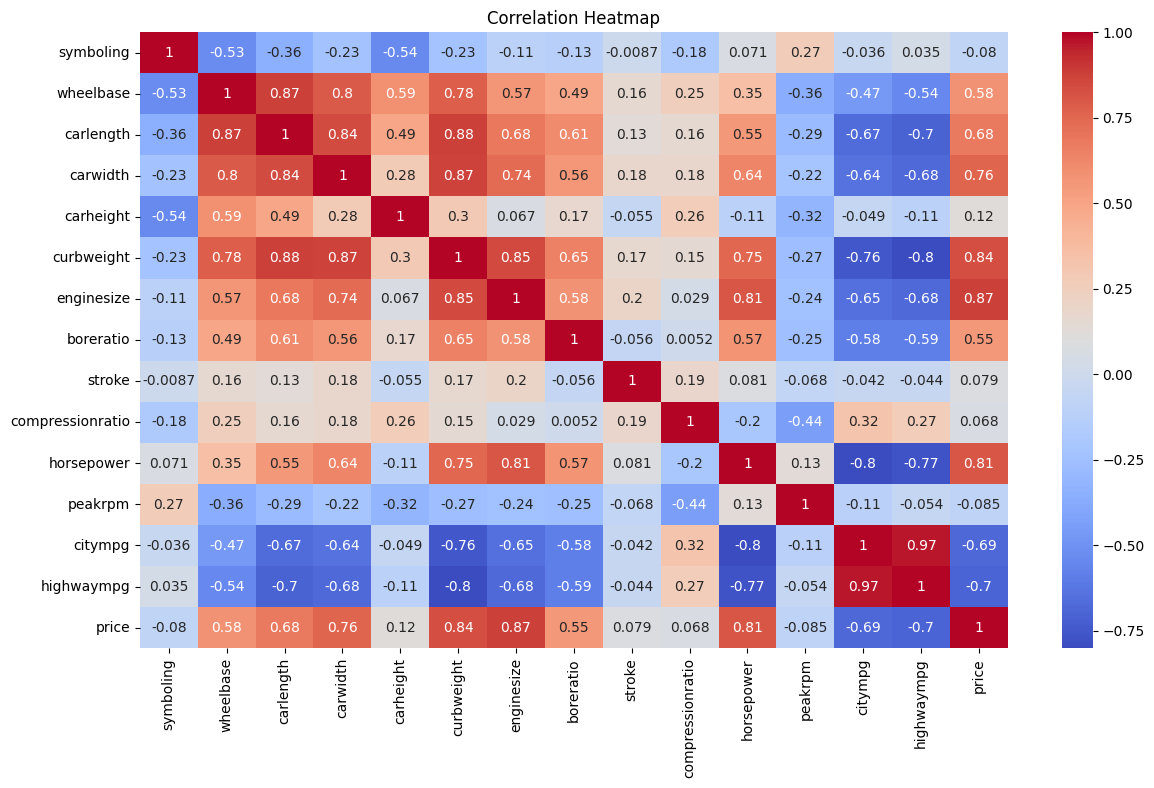

In [7]:
# Heatmap of numeric features
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

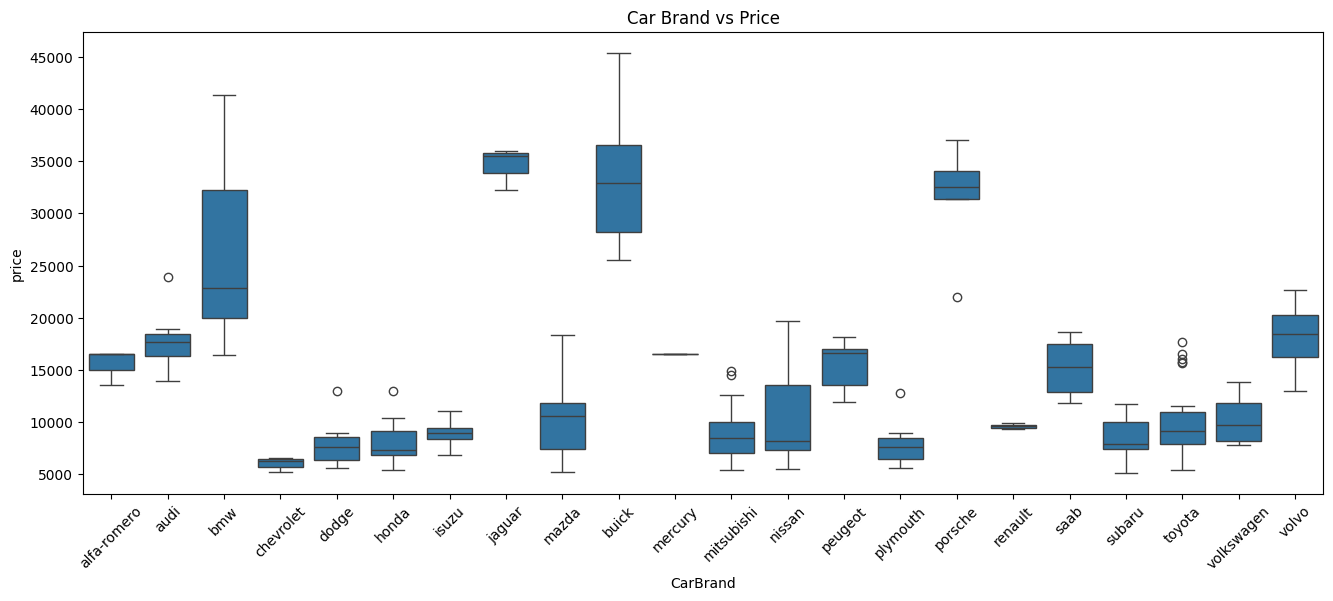

In [8]:
# Car Brands vs Price
plt.figure(figsize=(16,6))
sns.boxplot(data=df, x='CarBrand', y='price')
plt.xticks(rotation=45)
plt.title('Car Brand vs Price')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import joblib

In [10]:
# One-hot encode categoricals
cat_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [11]:
# Feature-target split
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Train RandomForest
model = RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [15]:
# Predictions
y_pred = model.predict(X_test_scaled)

In [16]:
# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R² Score: 0.9595986218045641
MAE: 1247.9340873983742


In [17]:
joblib.dump(model, "car_price_model1.joblib")
joblib.dump(scaler, "scaler.joblib")
joblib.dump(X.columns.tolist(), "model_columns1.joblib")

['model_columns1.joblib']